# Supervised Learning Foundations Project: ReCell

## Context
Buying and selling used smartphones used to be something that happened on a handful of online marketplace sites. But the used and refurbished phone market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used smartphones that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing a smartphone. There are plenty of other benefits associated with the used smartphone market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished smartphones. Maximizing the longevity of mobile phones through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost the cheaper refurbished smartphone segment, as consumers cut back on discretionary spending and buy phones only for immediate needs.

## Objective
The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished smartphones. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone and identify factors that significantly influence this predicted price.

## Data Overview
The data provided contains the different attributes of used/refurbished phones. The detailed data dictionary is given below.

## Data Dictionary

- brand_name: Name of manufacturing brand
- os: OS on which the phone runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the phone battery in mAh
- weight: Weight of the phone in grams
- release_year: Year when the phone model was released
- days_used: Number of days the used/refurbished phone has been used
- new_price: Price of a new phone of the same model in euros
- used_price: Price of the used/refurbished phone in euros

Further market research on smartphones manufactured from 2013-2020 is available at https://phonesdata.com/

## Import all the required libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#to scale continous variables, if necessary
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# to build linear regression_model using statsmodels
import statsmodels.api as sm

## Importing Data

In [2]:
#import csv into dataframe
df = pd.read_csv('used_phone_data.csv')

In [3]:
#view the first five rows of the dataframe
df.head(5)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80


In [4]:
#view the last five rows of the dataframe
df.tail(5)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
3566,Asus,Android,15.88,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,654.5000,490.96
3567,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,518.8145,259.30
3568,Alcatel,Android,18.73,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,92.6500,69.81
3569,Alcatel,Android,18.73,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,101.9150,76.07
3570,Alcatel,Android,13.49,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,72.2415,50.48


In [5]:
#understand the shape of the dataframe
df.shape

(3571, 15)

- The dataframe has 3751 rows and 15 columns

## Data Preprocessing

### Variable Identification and Conversion

In [6]:
#observe the data types of the columns for the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


- There are 4 columns of the dtype object, 9 columns of the dtype float64, and 2 columns of the dtype int64
- Dependent variable is *used_price*

In [7]:
#number of unique values for each variable
df.nunique().sort_values(ascending=True)

4g                     2
5g                     2
os                     4
release_year           8
ram                   14
int_memory            16
brand_name            34
selfie_camera_mp      37
main_camera_mp        44
screen_size          127
battery              354
weight               613
days_used            930
used_price          3044
new_price           3099
dtype: int64

In [8]:
#identify variables which should be converted from object to category
for col in df.columns[df.dtypes=='object']:
    print(df[col].unique(),df[col].nunique())

['Honor' 'Others' 'HTC' 'Huawei' 'Infinix' 'Lava' 'Lenovo' 'LG' 'Meizu'
 'Micromax' 'Motorola' 'Nokia' 'OnePlus' 'Oppo' 'Realme' 'Samsung' 'Vivo'
 'Xiaomi' 'ZTE' 'Apple' 'Asus' 'Coolpad' 'Acer' 'Alcatel' 'BlackBerry'
 'Celkon' 'Gionee' 'Google' 'Karbonn' 'Microsoft' 'Panasonic' 'Sony'
 'Spice' 'XOLO'] 34
['Android' 'Others' 'iOS' 'Windows'] 4
['yes' 'no'] 2
['no' 'yes'] 2


- The column *brand_name* has 34 unique values, *os* has 4, and both *4g* and *5g* have 2
- All columns with object dtype object should be converted to category, which will reduce the space required to store the DataFrame and help with analysis later on
- 34 brand names is a large number of unique categories to differentiate during EDA

In [9]:
#convert all columns with dtype object into category
for col in df.columns[df.dtypes=='object']:
    df[col] = df[col].astype('category')

### Feature Engineering

In [10]:
#Create categorical variable for each phone's country of origin
#create alphabetical list of brand names
countries = df.brand_name.unique()
print(sorted(countries))

['Acer', 'Alcatel', 'Apple', 'Asus', 'BlackBerry', 'Celkon', 'Coolpad', 'Gionee', 'Google', 'HTC', 'Honor', 'Huawei', 'Infinix', 'Karbonn', 'LG', 'Lava', 'Lenovo', 'Meizu', 'Micromax', 'Microsoft', 'Motorola', 'Nokia', 'OnePlus', 'Oppo', 'Others', 'Panasonic', 'Realme', 'Samsung', 'Sony', 'Spice', 'Vivo', 'XOLO', 'Xiaomi', 'ZTE']


In [11]:
#create dictionary with brand names as keys and country of origin as values
country_of_brand = {'Honor':'China', 'Huawei':'China', 'Infinix':'China', 'Meizu':'China', 'Alcatel':'China', 
                  'Coolpad':'China', 'Gionee':'China', 'OnePlus':'China', 
                  'Oppo':'China', 'Vivo':'China', 'Xiaomi':'China', 'ZTE':'China', 
                  'HTC':'Taiwan', 'Acer':'Taiwan', 'Asus':'Taiwan',
                  'Others':'None', 'Lava':'India', 'Micromax':'India', 'Celkon':'India', 'Karbonn':'India', 'Realme':'India',
                  'Spice':'India', 'XOLO':'India', 'LG':'South Korea', 'Samsung':'South Korea', 
                  'Motorola':'USA', 'Apple':'USA', 'Google':'USA', 'Microsoft':'USA',
                  'Nokia':'Finland', 'BlackBerry':'Canada', 'Lenovo':'Hong Kong', 'Panasonic':'Japan', 'Sony':'Japan'}

In [12]:
#create new variable in dataframe mapping country of origin onto each phone's brand name
df['country_of_brand'] = df['brand_name'].map(country_of_brand).astype('category')

In [13]:
#confirm variable creation, dtype conversions and memory savings
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3571 non-null   category
 1   os                3571 non-null   category
 2   screen_size       3571 non-null   float64 
 3   4g                3571 non-null   category
 4   5g                3571 non-null   category
 5   main_camera_mp    3391 non-null   float64 
 6   selfie_camera_mp  3569 non-null   float64 
 7   int_memory        3561 non-null   float64 
 8   ram               3561 non-null   float64 
 9   battery           3565 non-null   float64 
 10  weight            3564 non-null   float64 
 11  release_year      3571 non-null   int64   
 12  days_used         3571 non-null   int64   
 13  new_price         3571 non-null   float64 
 14  used_price        3571 non-null   float64 
 15  country_of_brand  3571 non-null   category
dtypes: category(5), float64(

- Based on overview of columns with dtypes float64 and int64, these dtypes appear appropriate for the data contained in each respective column
- Due to the unique information provided by each variable, no variables can be combined or altered to reduce the number of variables in the dataframe

## Univariate Analysis

In [14]:
# function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(16, 6), kde=False, bins=None):
    """
    Combines boxplot and histogram

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (16,6))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="aqua"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette='viridis',
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points"
        )  # annotate the percentage

    plt.show()  # show the plot

In [16]:
#format numeric data for easier readability
pd.set_option(
    "display.float_format", lambda x: "%.2f" % x
)  # to display numbers rounded off to 2 decimal places

### Summary of categorical variables

In [17]:
df.describe(include = ['category']).T

,count,unique,top,freq
brand_name,3571,34,Others,509
os,3571,4,Android,3246
4g,3571,2,yes,2359
5g,3571,2,no,3419
country_of_brand,3571,10,China,1200


In [18]:
num_to_display = 10
print('\n')
for colname in df.dtypes[df.dtypes == 'category'].index:
    val_counts = df[colname].value_counts(dropna=False)
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n')



Others     509
Samsung    364
Huawei     264
LG         212
Lenovo     172
ZTE        141
Xiaomi     134
Oppo       129
Asus       126
Alcatel    125
Name: brand_name, dtype: int64
Only displaying first 10 of 34 values.


Android    3246
Others      202
Windows      67
iOS          56
Name: os, dtype: int64


yes    2359
no     1212
Name: 4g, dtype: int64


no     3419
yes     152
Name: 5g, dtype: int64


China          1200
South Korea     576
None            509
India           343
Taiwan          287
USA             206
Hong Kong       172
Japan           135
Finland         121
Canada           22
Name: country_of_brand, dtype: int64




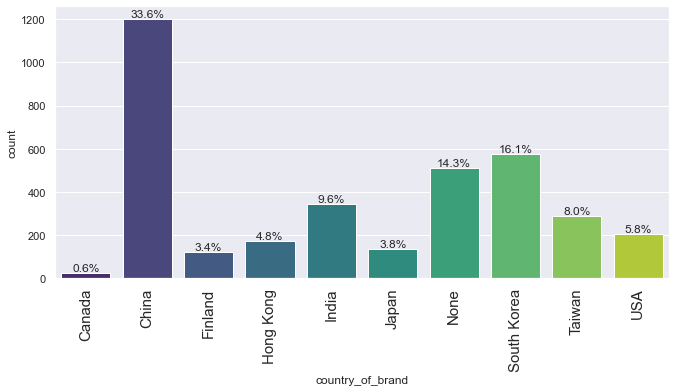

In [19]:
#create labeled barplot of phones by the country of the brand
labeled_barplot(df,'country_of_brand',perc=True)

- The top five brand names in the dataframe are Others (likely a "catch-all" value for a phone of an undetermined brand), Samsung, Huawei, LG, and Lenovo, which comprise ~43% of all phones
- Phones with an Android OS comprise ~91% of all phones
- 2359 of the phones are 4g capable, only 152 of the phones are 5g capable, and the remaining 72% of all phones have neither
- The top two countries of brands are China and South Korea, with 1200 (33%) of the phones being manufactured by Chinese brands and 576 (16%) being manufactured by South Korean brands

### Summary of float64 variables

In [20]:
#provide summary statistics of all float64 variables
df.describe(include = ['float64']).T

,count,mean,std,min,25%,50%,75%,max
screen_size,3571.00,14.80,5.15,2.70,12.70,13.49,16.51,46.36
main_camera_mp,3391.00,9.40,4.82,0.08,5.00,8.00,13.00,48.00
selfie_camera_mp,3569.00,6.55,6.88,0.30,2.00,5.00,8.00,32.00
int_memory,3561.00,54.53,84.70,0.01,16.00,32.00,64.00,1024.00
ram,3561.00,4.06,1.39,0.03,4.00,4.00,4.00,16.00
battery,3565.00,3067.23,1364.21,80.00,2100.00,3000.00,4000.00,12000.00
weight,3564.00,179.42,90.28,23.00,140.00,159.00,184.00,950.00
new_price,3571.00,237.39,197.55,9.13,120.13,189.80,291.94,2560.20
used_price,3571.00,109.88,121.50,2.51,45.20,75.53,126.00,1916.54


**Screen size analysis**

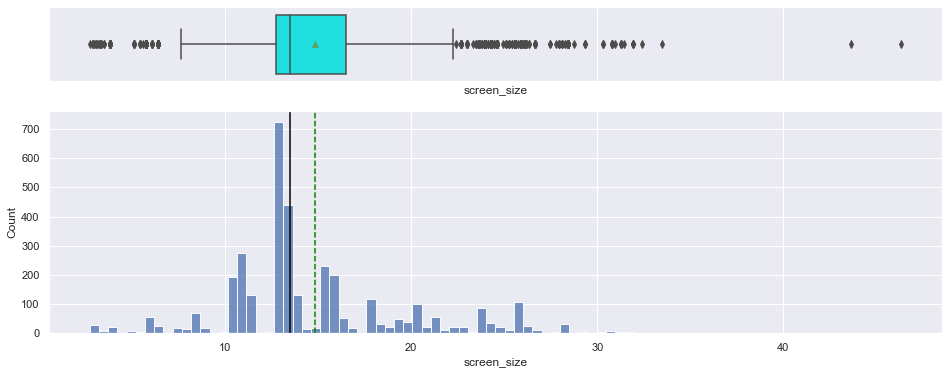

In [21]:
#provide boxplots and histograms of screen size
histogram_boxplot(df, 'screen_size')

- *Screen-size* is right skewed
- Outliers to the right indicate very large screens (~30 cm = 1 ft)
- Mean screen size is around 14.8 cm

**Main camera & "Selfie camera" (i.e. front camera) analysis**

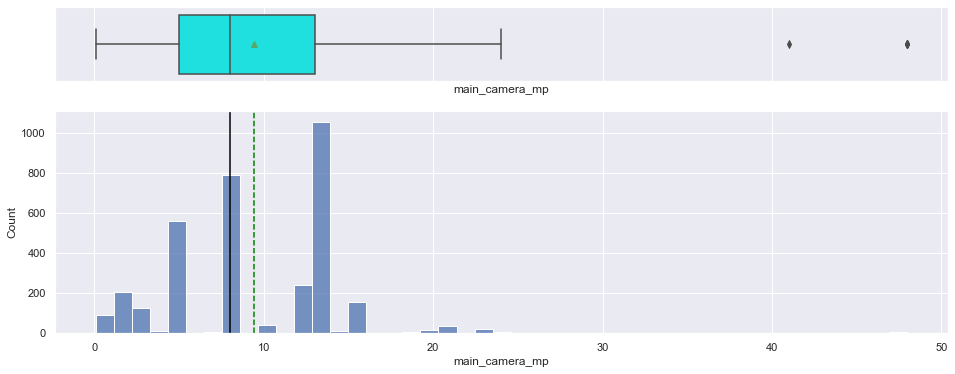

In [22]:
histogram_boxplot(df, 'main_camera_mp')

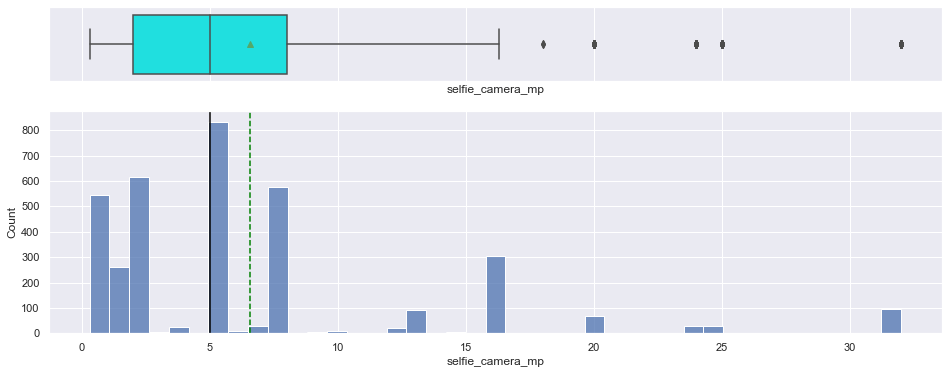

In [23]:
histogram_boxplot(df, 'selfie_camera_mp')

- Both distributions are right skewed
- Outliers to the right indicate very high resolution cameras
- The mean megapixels (MP) for the main camera and front camera is 9 MP and 6 MP, respectively
- Market research shows that outliers for both main and front cameras are consistent with those available on smartphones released from 2013-2020

**Read-only memory (ROM) & random-access memory (RAM) analysis**

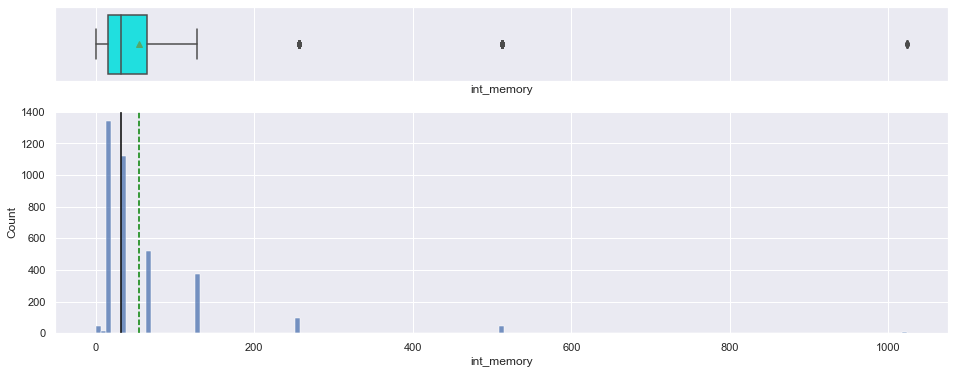

In [24]:
histogram_boxplot(df, 'int_memory')

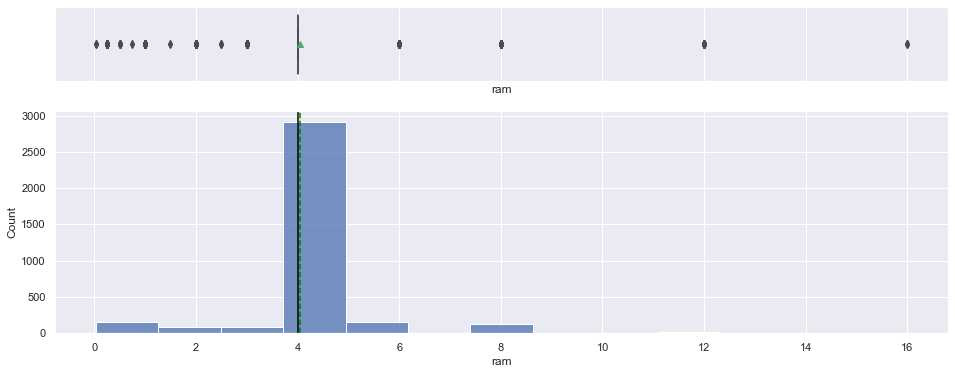

In [25]:
histogram_boxplot(df, 'ram')

- Both distributions are right skewed
- Outliers to the right indicate phones with very large amounts of internal memory (i.e. read-only memory (ROM)) and random access memory (RAM)
- The mean amounts of ROM and RAM are 55GB and 4GB, respectively
- Market research shows that outliers for both ROM and RAM are consistent with those avaiable on smartphones released from 2013-2020

**Weight analysis**

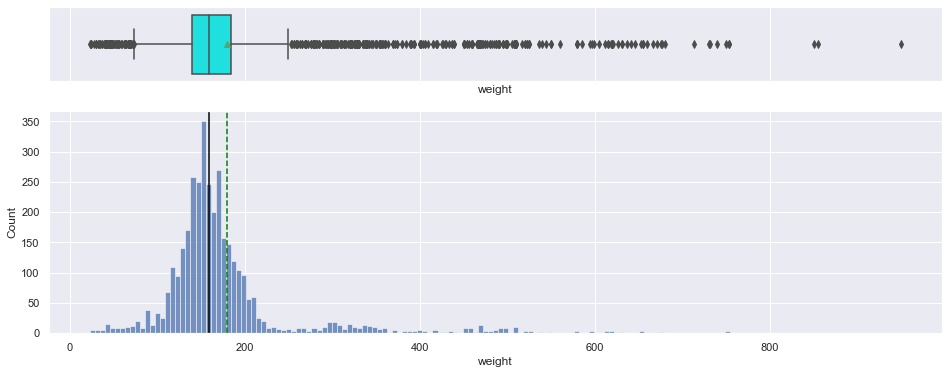

In [26]:
histogram_boxplot(df, 'weight')

- Distribution is heavily right skewed
- Outliers to the right indicate very heavy phones (~450g = 1 lb)
- The mean weight is ~180g

**Battery analysis**

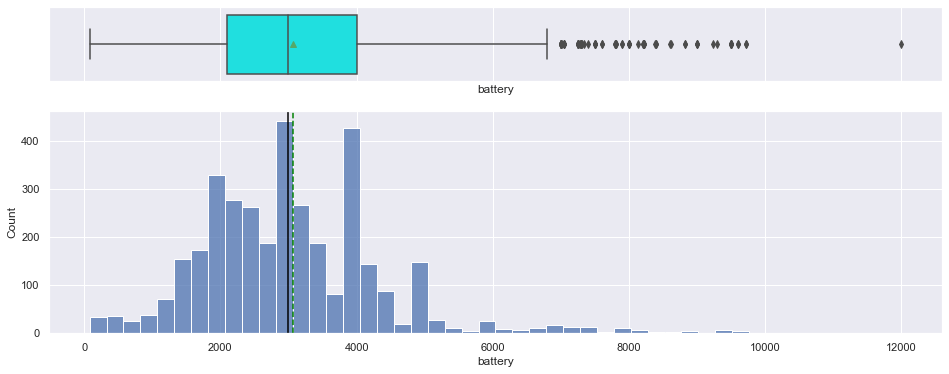

In [27]:
histogram_boxplot(df, 'battery')

- Distribution is right skewed
- Outliers to the right indicate phones with very large batteries
- The mean battery is ~3000 mAh
- Market research shows that outliers for the battery size are consistent with those avaiable on smartphones released from 2013-2020

**New price analysis**

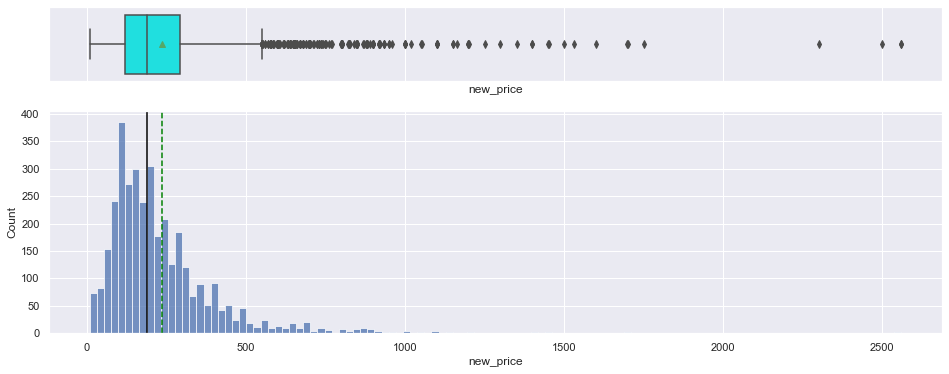

In [28]:
histogram_boxplot(df, 'new_price')

- Distribution is heavily right skewed
- Outliers to the right indicate very expensive new phones
- The mean new price is 237 euros

**Used price analysis**

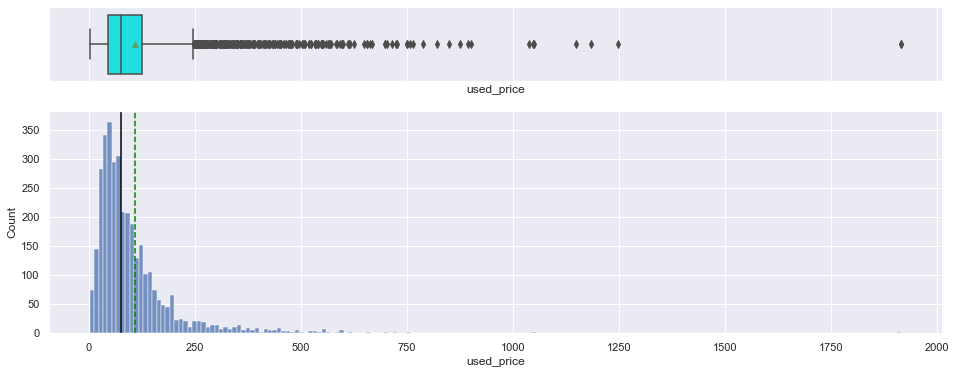

In [29]:
histogram_boxplot(df, 'used_price')

- Distribution is heavily right skewed
- Outliers to the right indicate very expensive used phones
- The mean used price is 110 euros

### Summary of int64 variables

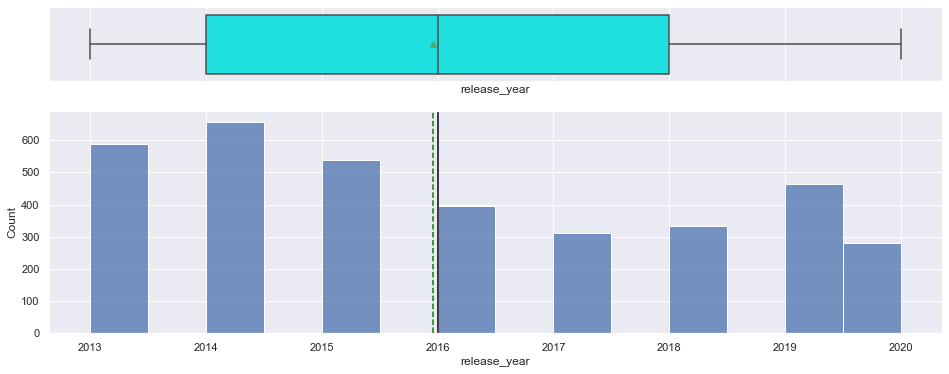

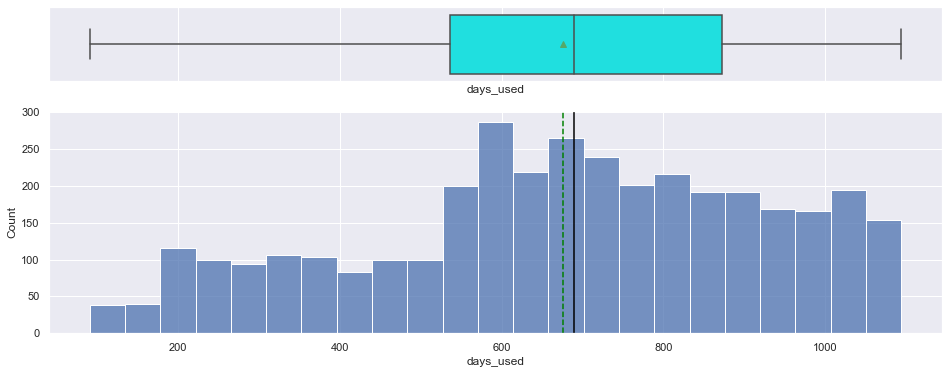

In [30]:
#provide boxplots and histograms of int64 variables
for col in df.columns[df.dtypes == 'int64']:
    histogram_boxplot(df, col)

In [31]:
#provide summary statistics of all continuous variables
df.describe(include = ['int64']).T

,count,mean,std,min,25%,50%,75%,max
release_year,3571.00,2015.96,2.29,2013.00,2014.00,2016.00,2018.00,2020.00
days_used,3571.00,675.39,248.64,91.00,536.00,690.00,872.00,1094.00


- Phones in the dataframe were released between 2013 and 2020
- Half the phones were released prior to 2016
- Phones were used between 91 and 1094 (3 years) days prior to being resold
- The distribution for days used is left skewed
- The mean days used is 675 (~1.8 years)

### Missing values

In [32]:
#identify the columns with missing values
df.isna().sum().sort_values(ascending=False)

main_camera_mp      180
int_memory           10
ram                  10
weight                7
battery               6
selfie_camera_mp      2
brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
release_year          0
days_used             0
new_price             0
used_price            0
country_of_brand      0
dtype: int64

- There are 6 columns with missing values, of which *main_camera_mp* has 180, *ram* and *int_memory* have 10, *weight* has 7, *battery* has 6, and *selfie_camera_mp* has only 2
- The remaining 9 columns, which importantly includes our dependent variable *used_price*, have no missing values
- Further analysis is required before deciding on how to replace or remove missing values within each column, but the number of rows with null values is fortunately very small compared to the total number of observations

In [33]:
#create new dataframe of rows which include any null values, then sample rows to analyze non-null data provided within rows
is_NaN = df.isnull().any(axis=1)
df_null = df[is_NaN]
df_null.shape

(203, 16)

- The dataframe has 203 rows containing at least one column with a null value

In [34]:
#select a random sample of 10 rows with one or more non-null values
np.random.seed(1)
df_null.sample(n=10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,country_of_brand
3480,Meizu,Android,16.19,yes,yes,NaN,20.00,128.00,8.00,4500.00,219.00,2020,139,600.09,451.07,China
3481,Motorola,Android,15.88,yes,no,NaN,8.00,32.00,3.00,4000.00,189.40,2020,101,169.99,125.64,USA
126,Oppo,Android,23.97,yes,yes,NaN,32.00,128.00,8.00,4000.00,172.00,2020,187,470.34,356.01,China
329,Meizu,Android,15.56,yes,no,NaN,20.00,128.00,6.00,3600.00,165.00,2019,226,421.12,318.15,China
3382,Realme,Android,16.03,yes,no,NaN,13.00,64.00,4.00,5000.00,198.00,2019,299,143.65,95.52,India
161,Vivo,Android,24.13,yes,yes,NaN,32.00,128.00,8.00,4315.00,181.50,2020,145,630.25,470.69,China
146,Realme,Android,15.40,yes,no,NaN,5.00,32.00,2.00,4000.00,166.00,2019,399,100.62,65.48,India
197,Xiaomi,Android,25.88,yes,yes,NaN,16.00,128.00,6.00,4500.00,208.00,2020,184,260.81,196.45,China
352,Oppo,Android,22.07,yes,yes,NaN,32.00,128.00,8.00,4000.00,183.00,2020,281,369.30,257.34,China
195,Xiaomi,Android,24.29,yes,yes,NaN,16.00,64.00,6.00,4520.00,205.00,2020,301,200.60,128.76,China


- These 203 rows with one or more null values appears to provide valid, non-dull data consistent with the rest of the dataframe
- However, this dataframe is dominated by rows with only null values in the 'main_camera_mp' column

In [35]:
#drop rows with null values in the 'main_camera_mp' column and draw a randome sample of 10 rows from this subset 
df_null_new = df_null.dropna(subset=['main_camera_mp'])
df_null_new.sample(n=10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,country_of_brand
3118,XOLO,Windows,12.70,no,no,8.00,2.00,32.00,4.00,2200.00,NaN,2015,838,120.51,36.14,India
3114,XOLO,Android,13.49,yes,no,8.00,5.00,16.00,4.00,3200.00,NaN,2015,800,179.33,53.81,India
1901,Meizu,Android,13.49,yes,no,13.00,5.00,16.00,4.00,NaN,145.00,2014,986,129.49,38.67,China
2148,Nokia,Others,5.72,no,no,0.30,2.00,NaN,NaN,1100.00,78.40,2015,559,29.33,14.76,Finland
2145,Nokia,Others,5.72,no,no,2.00,2.00,NaN,NaN,1100.00,79.00,2015,798,40.48,16.13,Finland
2037,Microsoft,Windows,26.35,no,no,5.00,3.50,32.00,4.00,NaN,675.90,2013,931,331.21,99.49,USA
3119,XOLO,Android,12.70,no,no,8.00,5.00,32.00,4.00,2500.00,NaN,2015,1045,119.75,35.78,India
2141,Nokia,Others,5.72,no,no,0.30,0.30,NaN,NaN,NaN,82.60,2016,1023,38.78,11.42,Finland
2140,Nokia,Others,5.72,no,no,0.30,0.30,NaN,NaN,NaN,81.00,2016,815,29.21,8.65,Finland
3113,XOLO,Android,12.70,yes,no,13.00,5.00,32.00,4.00,2400.00,NaN,2015,576,138.44,69.38,India


- This subset of rows with null values also appears to provide valid, non-null data
- Since all of the predictor variables with missing data are skewed, we can replace the missing values in each column with its median

In [36]:
#lamda function to replace missing data in predictor variables
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller, axis=0)

In [37]:
#verify the missing values have been replaced
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3571 non-null   category
 1   os                3571 non-null   category
 2   screen_size       3571 non-null   float64 
 3   4g                3571 non-null   category
 4   5g                3571 non-null   category
 5   main_camera_mp    3571 non-null   float64 
 6   selfie_camera_mp  3571 non-null   float64 
 7   int_memory        3571 non-null   float64 
 8   ram               3571 non-null   float64 
 9   battery           3571 non-null   float64 
 10  weight            3571 non-null   float64 
 11  release_year      3571 non-null   int64   
 12  days_used         3571 non-null   int64   
 13  new_price         3571 non-null   float64 
 14  used_price        3571 non-null   float64 
 15  country_of_brand  3571 non-null   category
dtypes: category(5), float64(

- Missing values have been treated

## Bivariate analysis

#### Correlation heat map

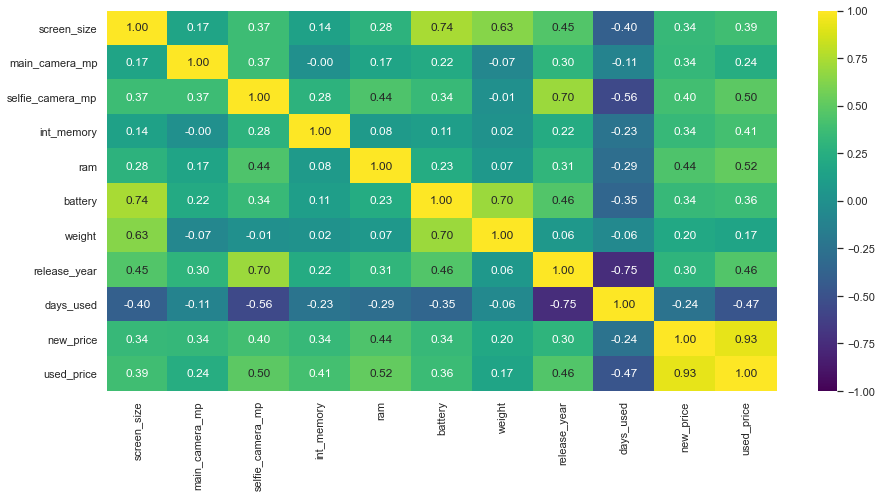

In [38]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap='viridis',
)
plt.show()

**Observations**
- *new_price* is highly positively correlated with *used_price*, which means that as the new price of a phone increases, the used price of a phone tends to increase.
- *days_used* is negatively correlated with *release_year*, which means that as the number of days a phone has been used increases, the year a phone was released tends to decrease.
- *screen_size* is positively correlated with *battery* and *weight*, which means that as a phone's screen size increases, the weight of the phone and the size of the battery also tend to increase.

#### Potential predictors in *used_price* model
- All of the variables, except *days_used*, appear to at least show some positive correlation with *used_price*
- *used_price* is positively correlated with *new_price*, *ram*, *selfie_camera_mp*,  and *release_year*, and negatively correlated with *days_used*. Therefore, this indicates these variables could be predictors of *used_price* in our linear model.

In [39]:
#create tables of the top ten of each category grouped by highest mean used price
num_to_display = 10
print('\n')
for colname in df.dtypes[df.dtypes == 'category'].index:
    means = df.groupby(colname).used_price.mean().sort_values(ascending=False)
    print(means[:num_to_display])
    if len(means) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(means)} values.')
    print('\n')



brand_name
OnePlus   318.52
Apple     293.23
Google    239.21
Oppo      180.85
Huawei    176.26
Vivo      168.19
Xiaomi    137.47
Honor     132.29
Samsung   132.08
Meizu     126.52
Name: used_price, dtype: float64
Only displaying first 10 of 34 values.


os
iOS       280.76
Android   111.97
Windows    65.08
Others     43.81
Name: used_price, dtype: float64


4g
yes   139.27
no     52.68
Name: used_price, dtype: float64


5g
yes   416.89
no     96.23
Name: used_price, dtype: float64


country_of_brand
USA           164.82
China         138.41
South Korea   126.11
Canada        102.04
Japan          99.14
Taiwan         95.08
None           78.49
Hong Kong      77.15
Finland        59.39
India          47.75
Name: used_price, dtype: float64




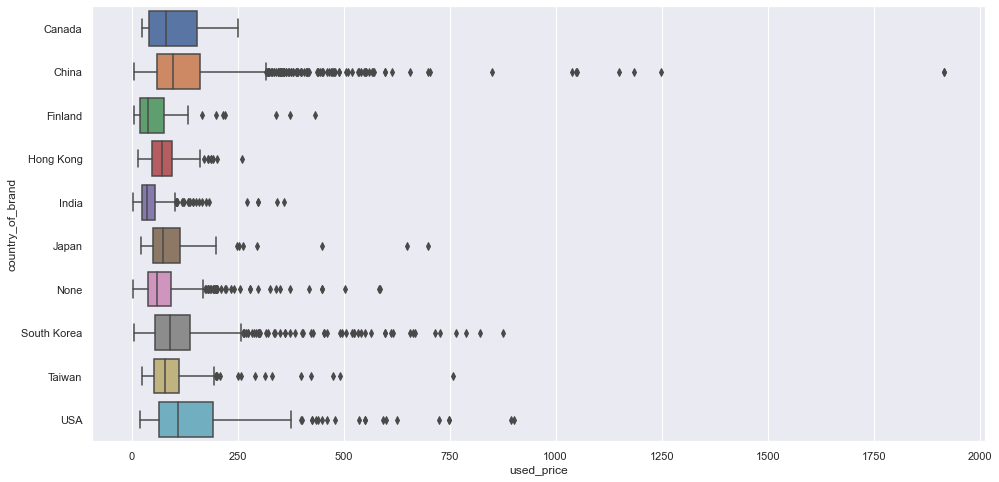

In [40]:
#create boxplot of used prices by country of origin
plt.figure(figsize=(16, 8))
sns.boxplot(y='country_of_brand', x="used_price", data=df)
plt.show()

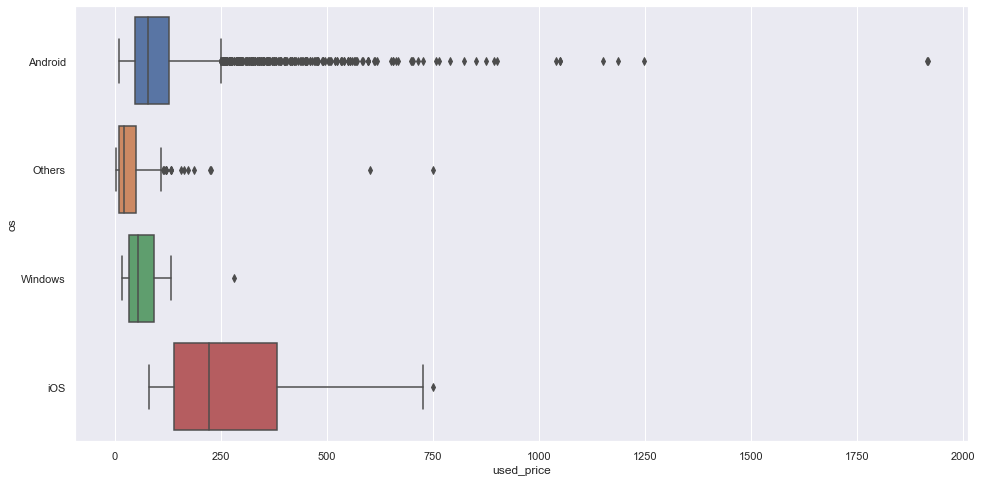

In [41]:
#create boxplot for used price by operating system
plt.figure(figsize=(16, 8))
sns.boxplot(y='os', x="used_price", data=df)
plt.show()

**Observations**
- OnePlus, Apple, and Google phones are the top three most expensive phones to buy used by a considerable margin
- Phones with an iOS operating system are considerably more expensive than phones with other operating systems
- A phone that is 5g-capable will cost ~4x more than a phone with either 4g or neither
- Phones manufactured by companies based in the US, China, and South Korea are the most expensive, all three also are shown to have a high number of expensive outliers

## Data Preprocessing (cont.)

### Transformations

**New price and Used price**
- Both the distributions for *new_price* and *used_price* appear to be log-normal
- Applying a logarithmic transformation to both should result in normal (or approximations) of normal distributions

In [42]:
df['new_log'] = np.log(df.new_price)
df['used_log'] = np.log(df.used_price)

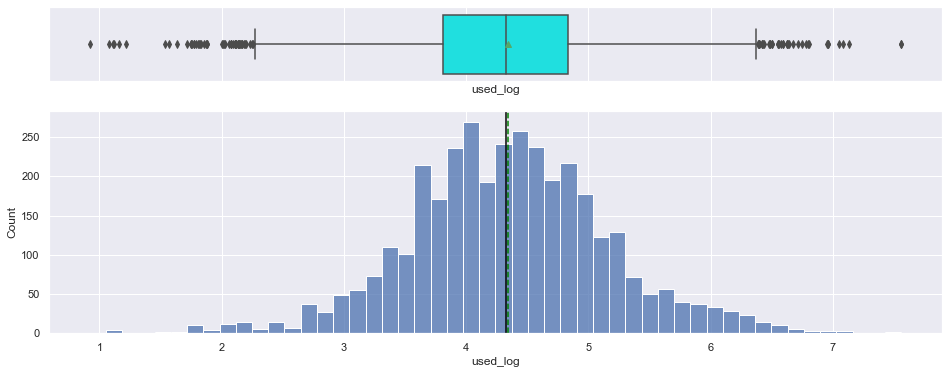

In [43]:
histogram_boxplot(df, 'used_log')

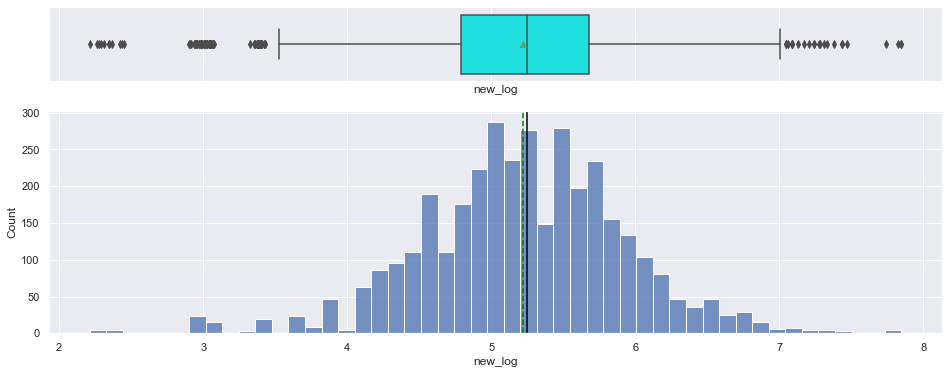

In [44]:
histogram_boxplot(df, 'new_log')

**Observations**
- Both transformed distributions are closer approximations of a normal distribution

### Outliers

In [45]:
#provide the rows with the top five values for a respective continuous variable
for col in df.columns[df.dtypes == 'float64']:
    print(df.sort_values(by=[col], ascending=False).head(5))
    print('\n')

     brand_name       os  screen_size   4g   5g  main_camera_mp  \
2562    Samsung  Android        46.36  yes   no            2.10   
387     Samsung  Android        43.66  yes   no           12.00   
1646     Lenovo  Android        33.50  yes   no            8.00   
204      Xiaomi  Android        32.39  yes  yes           12.00   
666       Apple      iOS        31.91  yes   no           12.00   

      selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
2562              5.00       32.00  4.00  5700.00   65.00          2015   
387               5.00       64.00  3.00 12000.00   23.00          2019   
1646              1.60       32.00  4.00  9600.00  950.00          2014   
204              20.00      512.00 12.00  4050.00  241.00          2019   
666               7.00     1024.00  4.00  9720.00  631.00          2018   

      days_used  new_price  used_price country_of_brand  new_log  used_log  
2562        627     639.87      255.73      South Korea     6.46     

**Screen-size**
- Market research shows that manufacturers do not sell smartphones with screens larger than 20 cm or smaller than 4 cm
- Therefore, I will consider all rows with screen sizes larger than 20cm or smaller than 4cm as not a smartphone and, therefore, not appropriate for the purposes of this analysis

In [46]:
#percent of all rows with screen size greater than 20 cm
df[df.screen_size>20].screen_size.count() / df.shape[0]

0.1685802296275553

In [47]:
#percent of all rows with screen size less than 4cm
df[df.screen_size<4].screen_size.count() / df.shape[0]

0.016241949033884068

<ipython-input-48-1bd320fa4d6e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_model = df_model[df.screen_size>4]


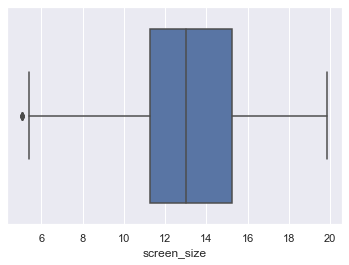

In [48]:
#create new dataframe for the model with only screen sizes smaller than 20 cm
df_model = df.copy()
df_model = df_model[df.screen_size<20]
df_model = df_model[df.screen_size>4]
sns.boxplot(data=df_model, x='screen_size')
plt.show()

**Weight**
- Market research shows that manufacturers do not sell smartphones heavier than 490 grams
- Therefore, I will consider all rows with weights heavier than 490g as tablets or laptops, which are not appropriate for the purposes of this analysis

In [49]:
#percent of all rows with weights greater than 490g
df[df.weight>490].weight.count() / df.shape[0]

0.02156258751050126

<ipython-input-50-6fb7b07ea423>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_model = df_model[df.weight<490]


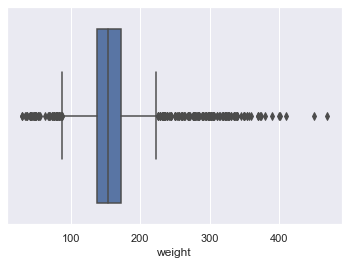

In [50]:
#create new dataframe with only weights less than 490g
df_model = df_model[df.weight<490]
sns.boxplot(data=df_model, x='weight')
plt.show()

In [51]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2907 entries, 4 to 3570
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        2907 non-null   category
 1   os                2907 non-null   category
 2   screen_size       2907 non-null   float64 
 3   4g                2907 non-null   category
 4   5g                2907 non-null   category
 5   main_camera_mp    2907 non-null   float64 
 6   selfie_camera_mp  2907 non-null   float64 
 7   int_memory        2907 non-null   float64 
 8   ram               2907 non-null   float64 
 9   battery           2907 non-null   float64 
 10  weight            2907 non-null   float64 
 11  release_year      2907 non-null   int64   
 12  days_used         2907 non-null   int64   
 13  new_price         2907 non-null   float64 
 14  used_price        2907 non-null   float64 
 15  country_of_brand  2907 non-null   category
 16  new_log           2907 n

## Linear Modeling

1. We want to predict the used price of a phone within the dataframe
2. Before we proceed to building a linear model, we'll have to encode categorical features
    - Since *brand_name* has 34 unique categories, the resulting number of dummy variables would unnecessarily complicate the results of the model; therefore, I will drop this variable and rely on *country_of_origin* to capture this variable's potential effects
3. We'll split 70% of the rows into a train dataset and the remaining 30% into a test dataframe
4. We will build a linear regression model using the train data, then check it's performance against the test data
5. Because we know that *used_log* and *new_log* are transformations of used price and new price, we can drop these variables from the model

In [52]:
#define our independent (i.e. predictor) variables, X, and our dependent variable, y
X = df_model.drop(['used_price','new_price','used_log','brand_name'], axis=1)
y = df_model['used_log']

In [53]:
#create dummy variables for all categorical variables
X = pd.get_dummies(X,
    columns=X.select_dtypes(include=["category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_log,...,5g_yes,country_of_brand_China,country_of_brand_Finland,country_of_brand_Hong Kong,country_of_brand_India,country_of_brand_Japan,country_of_brand_None,country_of_brand_South Korea,country_of_brand_Taiwan,country_of_brand_USA
4,15.72,13.00,8.00,64.00,3.00,5000.00,185.00,2020,293,4.95,...,0,1,0,0,0,0,0,0,0,0
6,19.84,8.00,5.00,32.00,2.00,3020.00,144.00,2020,234,4.52,...,0,1,0,0,0,0,0,0,0,0
7,18.57,13.00,8.00,64.00,4.00,3400.00,164.00,2020,219,5.19,...,0,1,0,0,0,0,0,0,0,0
8,15.72,13.00,16.00,128.00,6.00,4000.00,165.00,2020,161,5.30,...,0,1,0,0,0,0,0,0,0,0
10,16.67,13.00,8.00,64.00,3.00,3020.00,150.00,2020,268,4.71,...,0,1,0,0,0,0,0,0,0,0


In [54]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

In [55]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2034
Number of rows in test data = 873


In [56]:
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:               used_log   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     7263.
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:32:54   Log-Likelihood:                 2174.1
No. Observations:                2034   AIC:                            -4298.
Df Residuals:                    2009   BIC:                            -4158.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

**Observations**

- The training $R^2$ is **98.8%**, indicating that the model explains 98.8% of the variation in the train data; therefore, I can conclude the model is not underfitting
- Negative values of the coefficient show that *used_log* decreases with the increase of corresponding attribute value
- Positive values of the coefficient show that *used_log* increases with the increase of corresponding attribute value
- The p-value of a variable indicates if the variable is significant or not
- If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant to the linear model
- But these variables might contain multicollinearity or violate other assumptions of linear regression, which will affect the p-values

## Linear Regression Assumptions

Verify the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### Test For Multicollinearity

* **VIF standards**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# defining a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [58]:
checking_vif(x_train1).sort_values(by='VIF', ascending=False)

,feature,VIF
0,const,3789498.29
16,country_of_brand_China,39.93
22,country_of_brand_South Korea,26.17
21,country_of_brand_None,24.08
19,country_of_brand_India,18.54
23,country_of_brand_Taiwan,15.17
24,country_of_brand_USA,11.99
18,country_of_brand_Hong Kong,8.50
20,country_of_brand_Japan,8.16
17,country_of_brand_Finland,6.87


- Excluding the dummy variables, no other predictor variables show a VIF above 5

**The above predictors have no multicollinearity and the assumption is satisfied.**

**Observations**

- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

- Interestingly (and slightly concerning), the only variables which meet our p-value threshold (exluding the constant) are *release_year*, *days_used*, and *new_log*
- Therefore, I could conclude that all of the other variables are not significant and should be dropped from the model
- However, sometimes p-values change after dropping a variable, so I will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

In [59]:
# Below is a loop designed to complete the process outlined above
# initial list of columns
cols = x_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train1[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'release_year', 'days_used', 'new_log', '5g_yes', 'country_of_brand_South Korea', 'country_of_brand_Taiwan']


* Of the original 24 predictor variables, only **six** (excluding the constant) are shown to be statistically significant

In [60]:
x_train2 = x_train1[selected_features]
x_test2 = x_test1[selected_features]

In [61]:
olsmod2 = sm.OLS(y_train, x_train2).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:               used_log   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.911e+04
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:32:54   Log-Likelihood:                 2167.1
No. Observations:                2034   AIC:                            -4320.
Df Residuals:                    2027   BIC:                            -4281.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

**As shown above, no feature has p-value greater than 0.05, so I'll consider the features in *x_train2* and the model *olsmod2* as final**

**Additional observations**
* The adjusted R-squared is 0.988, i.e., our model is able to explain 98.8% of the variance
* Considering the adjusted R-squared in *olsmod0* was also 0.988, this shows that the 18 variables we dropped were not affecting the original model to any observable extent
* This process has resulted in a suprisingly simple model

### Test for Linearity and Independence
**Process for determining linearity and independence**
- Make a plot of fitted values vs residuals
- If they don't follow any pattern, then we conclude the model is linear and residuals are independent
- Otherwise, the model is showing signs of non-linearity and residuals are not independent

**Process for fixing variables if this assumption is not followed**
- Transform the variables and make the relationships linear

In [62]:
#create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
751,4.10,4.04,0.06
1172,3.87,3.91,-0.04
2130,4.00,3.94,0.06
1175,3.99,4.14,-0.15
2908,3.30,3.31,-0.00


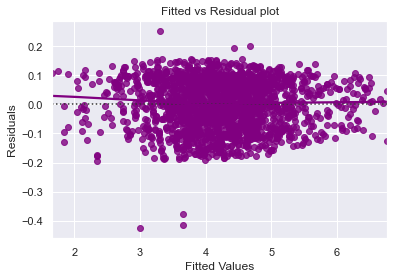

In [63]:
#plot a scatter plot to show the distribution of residuals (errors) vs fitted values (predicted values)

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**There is not discernable pattern in the plot above; therefore the assumptions of linearity and independence are satisfied**

### Test for Normality
**Process for determining normality**
- The shape of the histogram of residuals can give an initial idea about the normality
- It can also be checked via a Q-Q plot of residuals
    - If the residuals follow a normal distribution, they will make a straight line plot, otherwise not

**Process for fixing variables if this assumption is not followed**
- Apply transformations like log, exponential, arcsinh, etc. as per our data

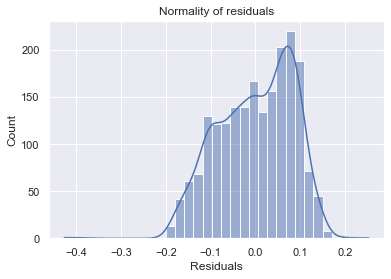

In [64]:
#create a histogram of the residuals
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does not have an exact bell shape, but is close enough for the purposes of the test

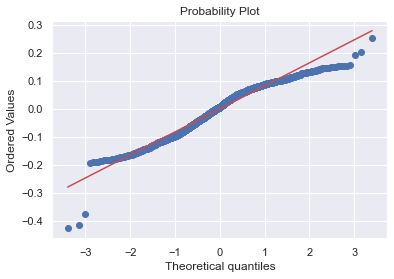

In [65]:
#create a Q-Q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals follow a straight line until the tails of the Q-Q plot

**As an approximation, I can accept this distribution as being normal; therefore, the assumption is satisfied.**

### Test for Homoscedasticity
**Process for determining homoscedasticity**
* The residual vs fitted values plot can be looked at to check for homoscedasticity
    - In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape
* The goldfeldquandt test can also be used
    - If we get a p-value > 0.05 we can say that the residuals are homoscedastic 
        - Null hypothesis: Residuals are homoscedastic
        - Alternate hypothesis: Residuals have heteroscedasticity

**Process for fixing variables if this assumption is not followed**
- Heteroscedasticity can be fixed by adding other important features or making transformations

In [66]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train2)
lzip(name, test)

[('F statistic', 0.9566041352241388), ('p-value', 0.7595256244598054)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic; therefore, this assumption is satisfied**

## Predictions

In [67]:
# predictions on the test set
pred = olsmod2.predict(x_test2)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
805,3.75,3.80
2232,4.33,4.45
1986,3.59,3.51
31,5.05,5.03
8,5.02,5.01
3482,4.54,4.48
831,4.57,4.44
2196,1.79,1.81
2946,4.60,4.67
3223,4.15,4.22


In [68]:
#the same set of actual versus predicted values transformed back into euros
df_pred_test = pd.DataFrame({"Actual": np.exp(y_test), "Predicted": np.exp(pred), 
                             "Difference": np.exp(pred)-np.exp(y_test), 
                             "Difference (%)": (np.exp(pred)-np.exp(y_test))*100/np.exp(y_test)})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted,Difference,Difference (%)
805,42.69,44.75,2.06,4.84
2232,75.58,85.32,9.74,12.89
1986,36.12,33.37,-2.75,-7.62
31,155.34,152.52,-2.82,-1.82
8,150.88,149.81,-1.07,-0.71
3482,93.86,88.61,-5.25,-5.59
831,96.51,84.95,-11.56,-11.97
2196,5.97,6.13,0.16,2.76
2946,99.86,106.57,6.71,6.72
3223,63.68,67.92,4.24,6.66


- We can observe that some predictions are close or very close to actual values, with 8 out of the 10 predicted values within 10 percent of the actual value

In [69]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [70]:
# checking model performance on train set (seen 70% data)
print("Training Performance")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train2, y_train)
olsmod2_train_perf

Training Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.08,0.07,0.99,0.99,1.74


In [71]:
# checking model performance on test set (seen 30% data)
print("Test Performance")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test2, y_test)
olsmod2_test_perf

Test Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.08,0.07,0.99,0.99,1.76


* The model is able to explain **~99%** of the variation in the test data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within **1.8%** of *np_log*

* Hence, we can conclude the model *olsmod2* is very good for prediction as well as inference purposes

In [72]:
olsmodel_final = sm.OLS(y_train, x_train2).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:               used_log   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.911e+04
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:32:56   Log-Likelihood:                 2167.1
No. Observations:                2034   AIC:                            -4320.
Df Residuals:                    2027   BIC:                            -4281.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

**Note**: the predictor variable *days_used* above should be negative (as in results shown above), but the transformation from normal back into log-normal does not allow for negatives 

In [73]:
df_model[['release_year','days_used','new_log']].describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,2907.00,2015.66,2.15,2013.00,2014.00,2015.00,2017.00,2020.00
days_used,2907.00,707.58,233.08,91.00,573.00,715.00,888.00,1094.00
new_log,2907.00,5.14,0.68,2.29,4.71,5.14,5.58,7.47


## Conclusions
Transforming the new price and used price for a phone from an assume log-normal distribution to a normal distribution complicates the interpretation of the model's results:
* The new price of a phone would need to be logarithmically transformed prior to being fed into the model
* Due to the nature of a log-normal distribution, the model would need inputs for all four variables prior to determining how much changing one variable would effect the *used_log* value predicted by the model
* The *used_log* predicted by the model would need to be transformed back into *used_price* to be interpreted as an amount in euros

However, some conclusions can be drawn from parameters above:
* Decreasing the *release_year* and increasing the number of *days_used* are shown to decrease the predicted used price of a phone
* Increasing the new price of a phone (and the resulting *new_log* value fed into the model) is shown to increase the predicted used price of that phone
* Having a phone with 5g will increase a phone's used price predicted by the model
* Having a phone of a brand from either South Korea or Taiwan will increase a phone's used price predicted by the model